<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notes</a></span><ul class="toc-item"><li><span><a href="#clean-and-check-groups" data-toc-modified-id="clean-and-check-groups-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>clean and check groups</a></span></li></ul></li><li><span><a href="#calculate-df" data-toc-modified-id="calculate-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>calculate df</a></span></li><li><span><a href="#plot-single" data-toc-modified-id="plot-single-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>plot single</a></span></li><li><span><a href="#plot-multi" data-toc-modified-id="plot-multi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>plot multi</a></span></li><li><span><a href="#Activity-place-cell-split-(extra)" data-toc-modified-id="Activity-place-cell-split-(extra)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Activity place cell split (extra)</a></span></li></ul></div>

# Notes
* CREB - sup = 6,  ADD mjd529
* DN - sup = 17, deep=0 
* control - sup = 4

In [1]:
colors = creb.colors

sns.set_palette(colors)
sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

In [2]:
import datetime

In [5]:
# load groups
CREB=['mjd532','mjd533','mjd534','mjd529']
DN=['mjd527','mjd528','mjd526']
CONTROL=['mjd535','mjd537']



exptSet = ExperimentSet('mdavis.sql')
CREB_mice = [exptSet.grabMouse(m) for m in CREB]
DN_mice = [exptSet.grabMouse(m) for m in DN]
CONTROL_mice = [exptSet.grabMouse(m) for m in CONTROL]


pc_kwargs = {'nPositionBins': 100,'channel': 'Ch2','imaging_label': 'suite2p','demixed': False}


# grab eperiments
CREB_SUP_set = place.pcExperimentGroup.fromMice(
    CREB_mice, tag='SUP', label='CREB Sf',signal=None, **pc_kwargs)# merge
CONTROL_SUP_set = place.pcExperimentGroup.fromMice(
    CONTROL_mice, tag='SUP', label='Control Sf', signal=None,**pc_kwargs)
CREB_DEEP_set = place.pcExperimentGroup.fromMice(
    CREB_mice, tag='DEEP', label='CREB Deep',signal=None, **pc_kwargs)# merge
CONTROL_DEEP_set = place.pcExperimentGroup.fromMice(
    CONTROL_mice, tag='DEEP', label='Control Deep', signal=None,**pc_kwargs)
"""
DN_SUP_set = place.pcExperimentGroup.fromMice(
    DN_mice, label='dn-CREB',signal=None, **pc_kwargs)
"""
# manual DN   
dn_json='/home/matt/creb/expt_grps/layer/dn_sup.json'
DN_SUP_set = lab.classes.pcExperimentGroup.from_json(
                    dn_json, exptSet, imaging_label='suite2p',
                    label='dn-CREB Sf',signal=None)

# put in groups
exptGrps = [CONTROL_SUP_set, CREB_SUP_set,CONTROL_DEEP_set,CREB_DEEP_set, DN_SUP_set]



## clean and check groups

In [10]:
# look for expts without spikes
for expt_grp in exptGrps:
    print expt_grp
    expt_grp.removeShortExperiments(datetime.timedelta(seconds=710)) # clean up
    
    expt_grp.removeShortExperiments(laps=5)
    
    for expt in expt_grp:
        if expt.get('belt') == 'burlap':
            expt_grp.remove(expt)
            continue
            
        print expt.hasDfofTracesFile(), expt.get('imagingLayer'), expt.get('experimentType'),expt.get('belt')

<Experiment group: label=Control Sf, nExpts=4>
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
<Experiment group: label=CREB Sf, nExpts=6>
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
True sup-pyr randomForaging mjd4b
<Experiment group: label=Control Deep, nExpts=9>
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
<Experiment group: label=CREB Deep, nExpts=11>
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr randomForaging mjd4b
True deep-pyr rand

In [54]:
for expt_grp in exptGrps:
    print expt_grp
    
    for expt in expt_grp:
        print expt.get('startTime')

<Experiment group: label=Control Sf, nExpts=4>
2018-06-16-16h37m36s
2018-06-16-19h06m19s
2018-06-16-14h06m20s
2018-06-16-16h05m14s
<Experiment group: label=CREB Sf, nExpts=6>
2018-06-06-10h37m18s
2018-06-06-14h37m44s
2018-06-06-12h29m12s
2018-06-06-15h27m58s
2018-06-06-13h04m58s
2018-06-06-15h56m17s
<Experiment group: label=Control Deep, nExpts=7>
2018-06-14-12h14m15s
2018-06-17-12h20m21s
2018-06-17-14h53m16s
2018-06-14-13h26m10s
2018-06-14-16h54m02s
2018-06-17-13h22m27s
2018-06-17-15h52m54s
<Experiment group: label=CREB Deep, nExpts=11>
2018-06-05-11h35m42s
2018-06-05-13h56m47s
2018-06-07-11h01m13s
2018-06-07-13h02m17s
2018-06-05-12h12m38s
2018-06-05-14h31m45s
2018-06-07-11h36m12s
2018-06-07-13h31m11s
2018-06-05-12h49m21s
2018-06-05-15h15m38s
2018-06-07-14h01m49s
<Experiment group: label=dn-CREB Sf, nExpts=17>
2018-04-19-13h09m59s
2018-04-19-14h41m23s
2018-04-20-10h54m30s
2018-04-20-12h18m58s
2018-04-21-11h42m24s
2018-04-21-12h59m29s
2018-04-19-13h47m53s
2018-04-19-15h06m15s
2018-04-2

# calculate df 

In [11]:
import sys
sys.path.insert(0, '/home/matt/code/analysis/analysis-scripts')
import place_cell_data_save_expt as pcse
import place_cell_data_save as pcs


roi_filters = [None] * len(exptGrps)

df_expt = pcse.save_data(exptGrps,roi_filters=roi_filters)
df_expt = mjdplot.attrib_to_df(df_expt,expt_col = 'expt' )




df_expt["mouse_grp"]=df_expt.apply(lambda x: x.expt_grp.split(" ")[0],axis=1)
df_expt["layer"]=df_expt.apply(lambda x: x.expt_grp.split(" ")[1],axis=1)

df_expt.shape

REWARD OFF
sensitivity


/home/matt/code/analysis/lab/analysis/place_cell_analysis.py:183: UserWarning: Sensitivity not calculated for pf width >0.5: 5 pfs skipped
  '{} pfs skipped'.format(n_wide_pfs))


specificity
sparsity
pf_width
trans_auc
trans_amplitude
trans_duration
trans_frequency
trans_auc_nr
trans_amplitude_nr
trans_duration_nr
trans_frequency_nr
trans_auc_all
trans_amplitude_all
trans_duration_all
trans_frequency_all
circ_var
circ_var_p
spatial_information
n_place_fields
> /home/matt/code/analysis/analysis-scripts/place_cell_data_save_expt.py(121)save_data()
-> full_df = pd.merge(df_list[0], df_list[1], on=merge_on, how='outer')


(Pdb)  continue


In [31]:
#df_expt.to_csv('df-by-expt-RF-SUP-DEEP.csv')

In [13]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)
df_expt

,sensitivity,expt_grp,specificity,sparsity,pf_width,trans_auc,trans_amplitude,trans_duration,trans_frequency,trans_auc_nr,trans_amplitude_nr,trans_duration_nr,trans_frequency_nr,trans_auc_all,trans_amplitude_all,trans_duration_all,trans_frequency_all,circ_var,circ_var_p,spatial_information,n_place_fields,trial_id,condition,day,session,experimentType,startTime,imagingLayer,mouseID,session_day
0,0.69,Control Sf,0.80,0.29,46.04,0.06,0.73,4.25,0.03,0.03,0.70,3.73,0.02,0.05,0.73,4.25,0.03,0.27,0.12,1.11,1.12,13169,1,3,1,randomForaging,2018-06-16-14h06m20s,sup-pyr,mjd537,1_3
1,0.70,Control Sf,0.81,0.28,42.06,0.06,0.69,4.00,0.04,0.04,0.70,3.89,0.03,0.06,0.69,4.00,0.04,0.30,0.09,1.47,1.12,13168,1,3,2,randomForaging,2018-06-16-16h05m14s,sup-pyr,mjd537,2_3
2,0.71,Control Sf,0.73,0.36,41.47,0.07,0.57,4.94,0.04,0.03,0.48,3.93,0.03,0.05,0.57,4.94,0.04,0.43,0.19,0.81,1.33,13139,1,3,1,randomForaging,2018-06-16-16h37m36s,sup-pyr,mjd535,1_3
3,0.67,Control Sf,0.74,0.33,36.08,0.07,0.68,4.72,0.04,0.04,0.58,4.25,0.03,0.06,0.68,4.72,0.04,0.40,0.15,1.08,1.29,13143,1,3,2,randomForaging,2018-06-16-19h06m19s,sup-pyr,mjd535,2_3
4,0.78,CREB Sf,0.76,0.26,32.32,0.02,0.22,3.23,0.04,0.01,0.16,3.52,0.02,0.01,0.22,3.23,0.04,0.34,0.21,1.22,1.19,13075,1,2,1,randomForaging,2018-06-06-10h37m18s,sup-pyr,mjd532,1_2
5,0.77,CREB Sf,0.73,0.30,38.67,0.03,0.31,3.35,0.05,0.01,0.22,3.58,0.02,0.02,0.31,3.35,0.05,0.30,0.12,1.10,1.15,13078,1,2,1,randomForaging,2018-06-06-12h29m12s,sup-pyr,mjd533,1_2
6,0.79,CREB Sf,0.74,0.31,38.85,0.03,0.33,4.39,0.05,0.00,0.18,3.51,0.02,0.02,0.33,4.39,0.05,0.42,0.26,1.06,1.12,13082,1,2,1,randomForaging,2018-06-06-13h04m58s,sup-pyr,mjd534,1_2
7,0.86,CREB Sf,0.79,0.28,34.09,0.02,0.24,2.89,0.05,0.01,0.19,3.82,0.02,0.01,0.24,2.89,0.05,0.32,0.09,1.58,1.16,13076,1,2,2,randomForaging,2018-06-06-14h37m44s,sup-pyr,mjd532,2_2
8,0.68,CREB Sf,0.74,0.29,33.86,0.02,0.27,4.18,0.05,0.00,0.18,3.52,0.02,0.02,0.27,4.18,0.05,0.36,0.10,1.38,1.24,13079,1,2,2,randomForaging,2018-06-06-15h27m58s,sup-pyr,mjd533,2_2
9,0.85,CREB Sf,0.77,0.27,39.22,0.03,0.28,6.18,0.04,0.00,0.20,5.69,0.02,0.02,0.28,6.18,0.04,0.30,0.19,1.37,1.12,13084,1,2,2,randomForaging,2018-06-06-15h56m17s,sup-pyr,mjd534,2_2


In [56]:
df_expt.head()

,sensitivity,expt_grp,specificity,sparsity,pf_width,trans_auc,trans_amplitude,trans_duration,trans_frequency,trans_auc_nr,trans_amplitude_nr,trans_duration_nr,trans_frequency_nr,trans_auc_all,trans_amplitude_all,trans_duration_all,trans_frequency_all,circ_var,circ_var_p,spatial_information,n_place_fields,trial_id,condition,day,session,experimentType,startTime,imagingLayer,mouseID,session_day,mouse_grp,layer
0,0.69,Control Sf,0.80,0.29,46.04,0.06,0.73,4.25,0.03,0.03,0.70,3.73,0.02,0.05,0.73,4.25,0.03,0.27,0.12,1.11,1.12,13169,1,3,1,randomForaging,2018-06-16-14h06m20s,sup-pyr,mjd537,1_3,Control,Sf
1,0.70,Control Sf,0.81,0.28,42.06,0.06,0.69,4.00,0.04,0.04,0.70,3.89,0.03,0.06,0.69,4.00,0.04,0.30,0.09,1.47,1.12,13168,1,3,2,randomForaging,2018-06-16-16h05m14s,sup-pyr,mjd537,2_3,Control,Sf
2,0.71,Control Sf,0.73,0.36,41.47,0.07,0.57,4.94,0.04,0.03,0.48,3.93,0.03,0.05,0.57,4.94,0.04,0.43,0.19,0.81,1.33,13139,1,3,1,randomForaging,2018-06-16-16h37m36s,sup-pyr,mjd535,1_3,Control,Sf
3,0.67,Control Sf,0.74,0.33,36.08,0.07,0.68,4.72,0.04,0.04,0.58,4.25,0.03,0.06,0.68,4.72,0.04,0.40,0.15,1.08,1.29,13143,1,3,2,randomForaging,2018-06-16-19h06m19s,sup-pyr,mjd535,2_3,Control,Sf
4,0.78,CREB Sf,0.76,0.26,32.32,0.02,0.22,3.23,0.04,0.01,0.16,3.52,0.02,0.01,0.22,3.23,0.04,0.34,0.21,1.22,1.19,13075,1,2,1,randomForaging,2018-06-06-10h37m18s,sup-pyr,mjd532,1_2,CREB,Sf


In [27]:
df_expt.expt_grp.iloc[0].split(" ")[0]

'Control'

# plot single

'\n(ax.set(xlabel=\'\', \n        ylabel=\'Place field correlation\',\n        xticklabels=["Session 3 \n Day 3","Session 1 \n Day 4"])\n    ._legend.remove())\n'

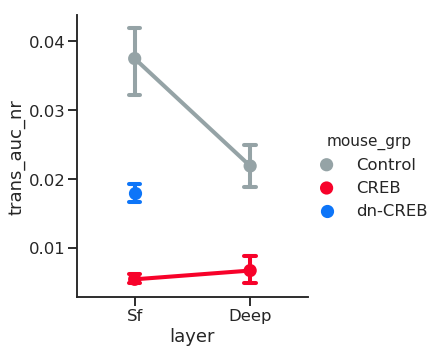

In [50]:
ax = sns.catplot(kind='point',data=df_expt,hue="mouse_grp",x="layer",y="trans_auc_nr",
                capsize=.1)

"""
(ax.set(xlabel='', 
        ylabel='Place field correlation',
        xticklabels=["Session 3 \n Day 3","Session 1 \n Day 4"])
    ._legend.remove())
"""

#ax.savefig('figs/pf-corr-by-reward.svg')

# plot multi

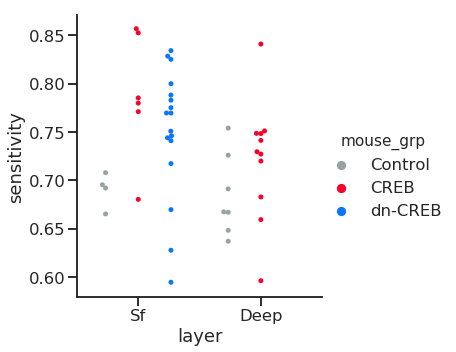

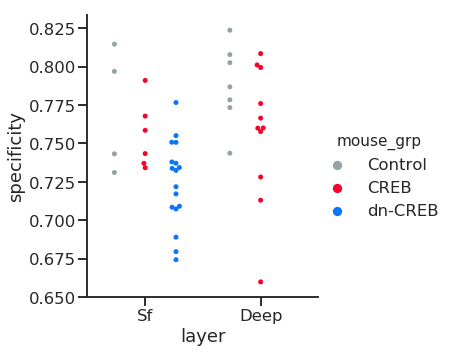

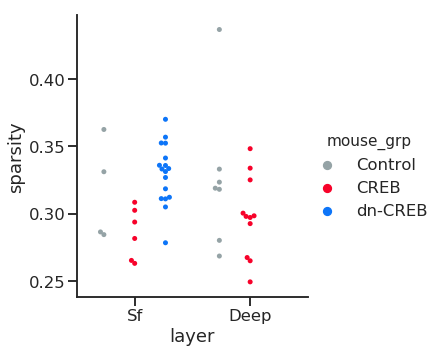

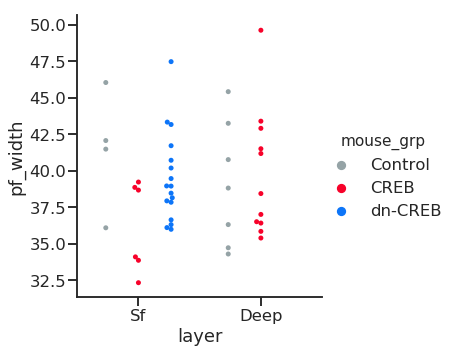

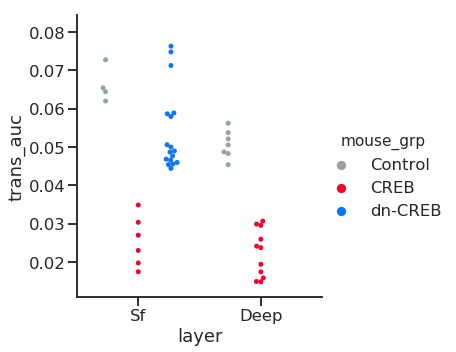

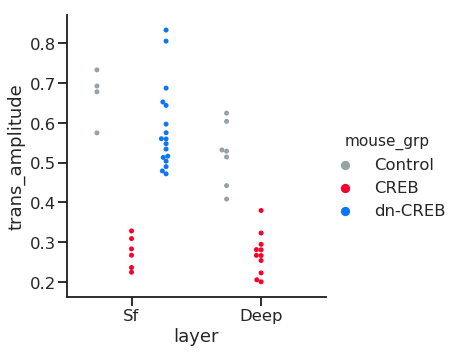

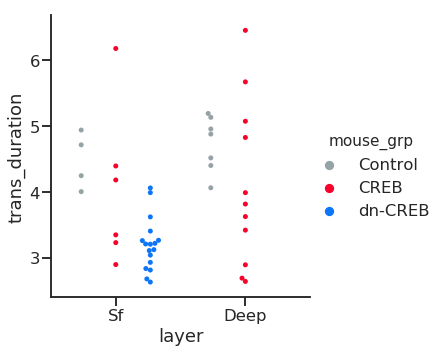

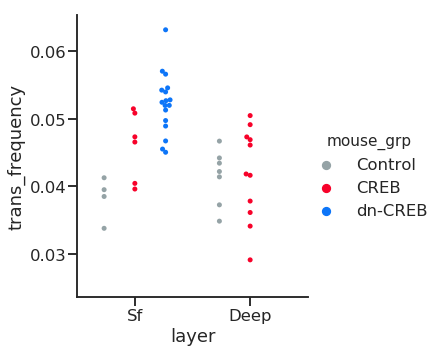

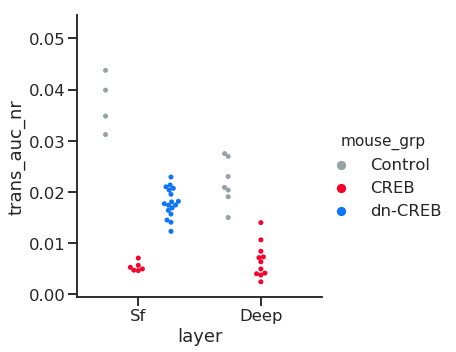

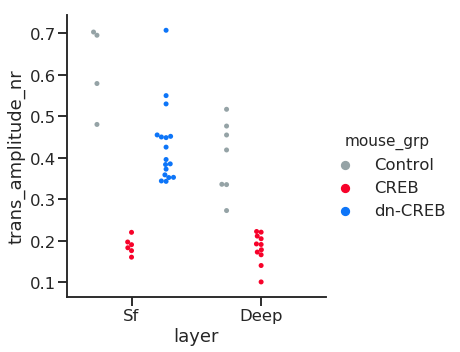

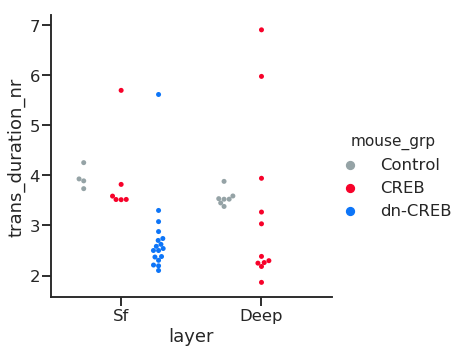

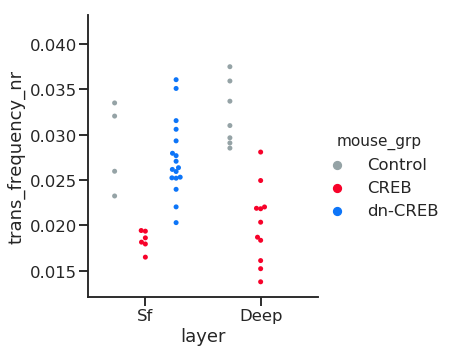

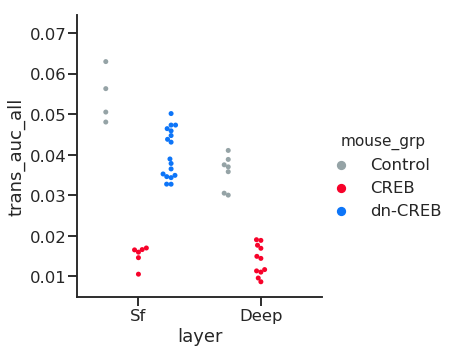

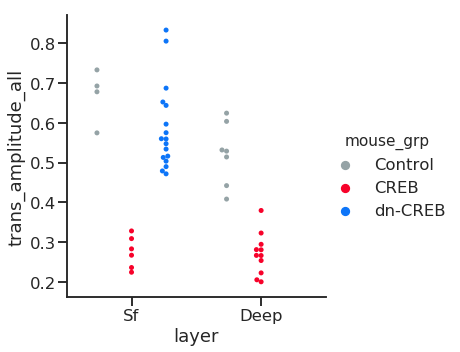

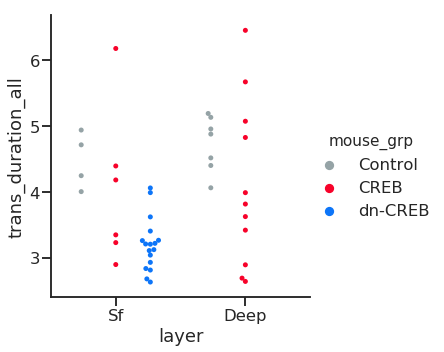

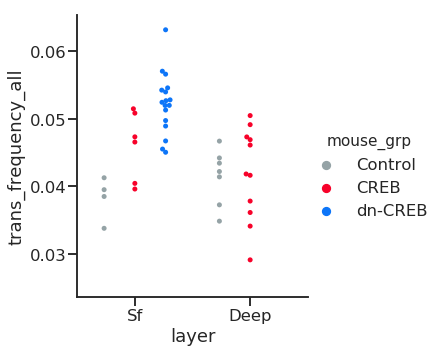

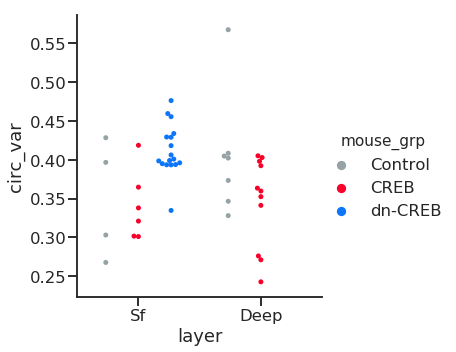

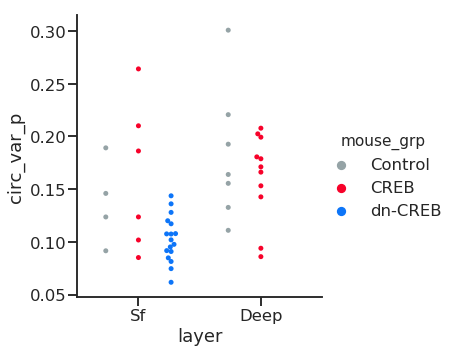

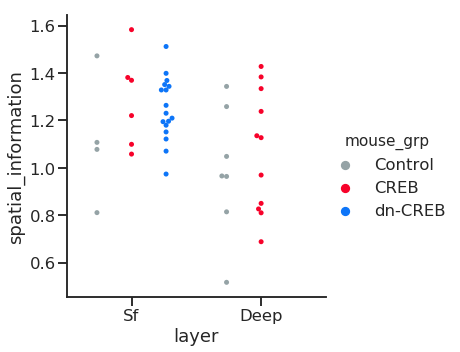

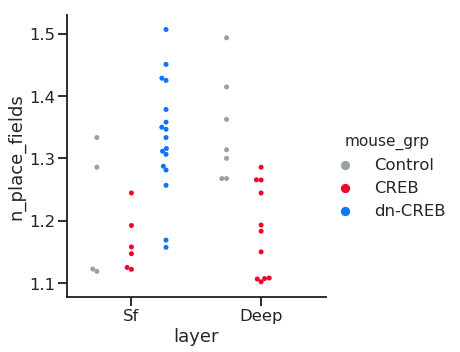

In [57]:
for key in df_expt.select_dtypes('float64').columns:
    
    g = sns.catplot(kind='swarm',data=df_expt,hue="mouse_grp",x="layer",y=key,
                dodge=True)

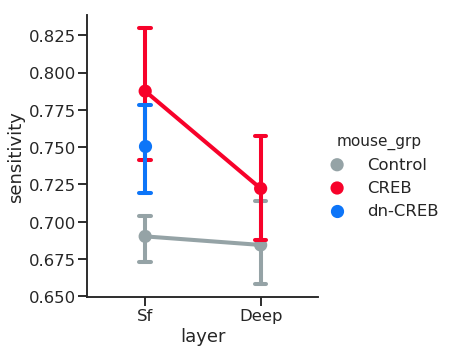

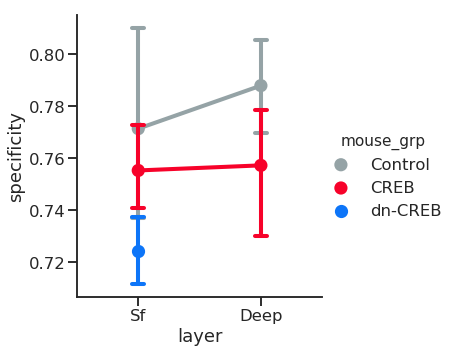

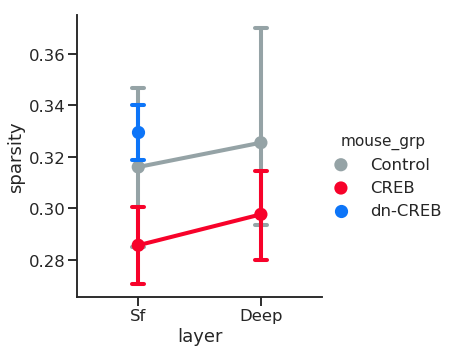

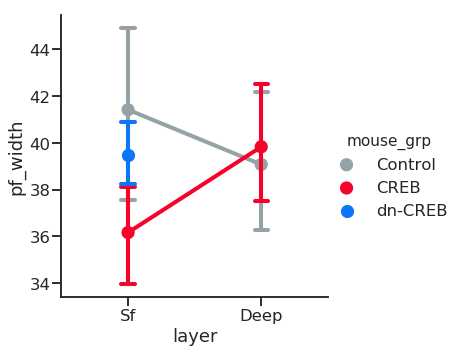

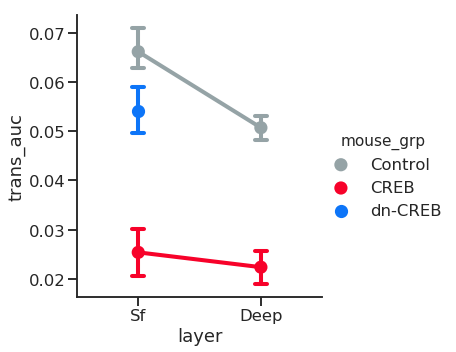

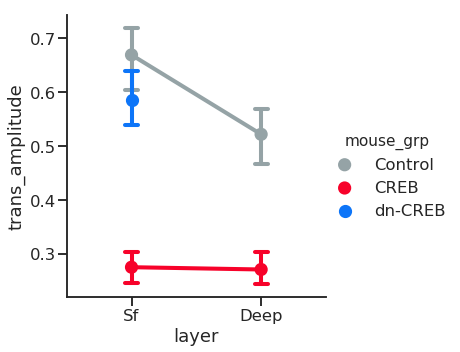

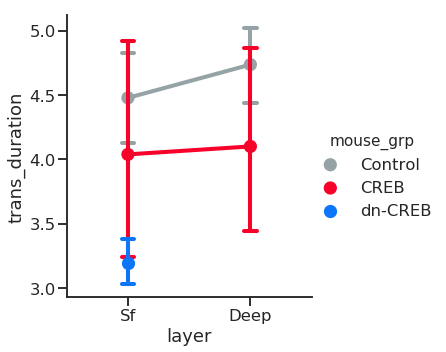

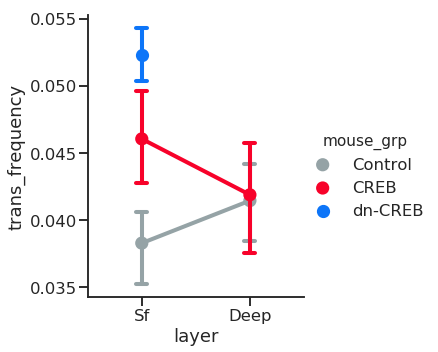

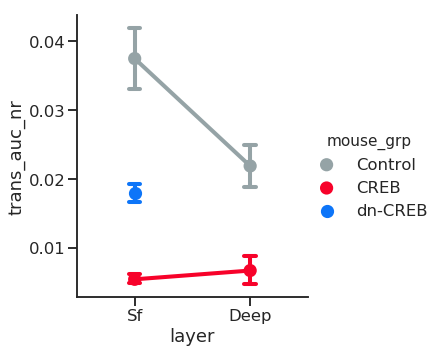

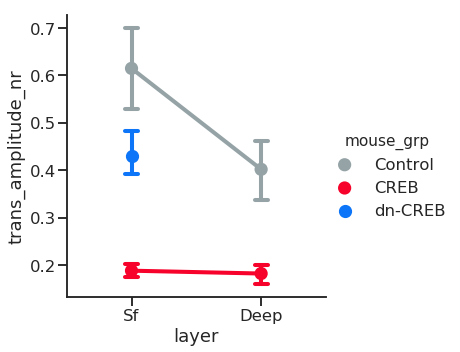

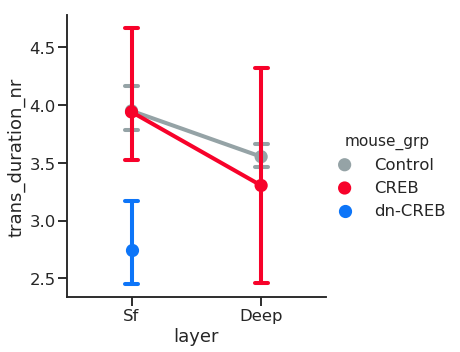

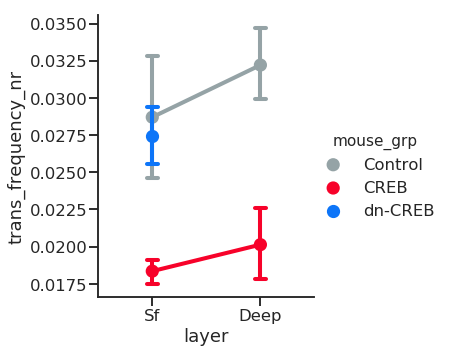

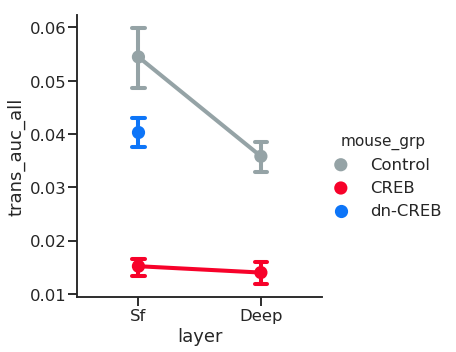

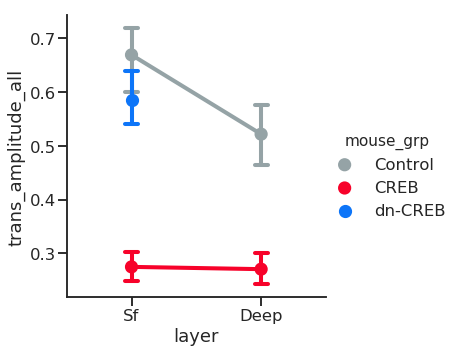

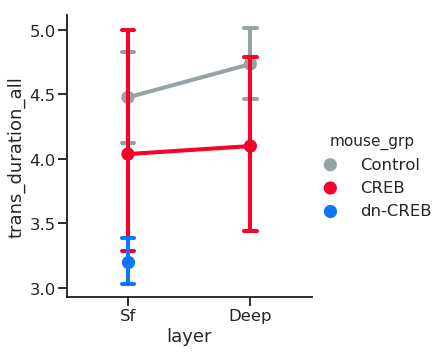

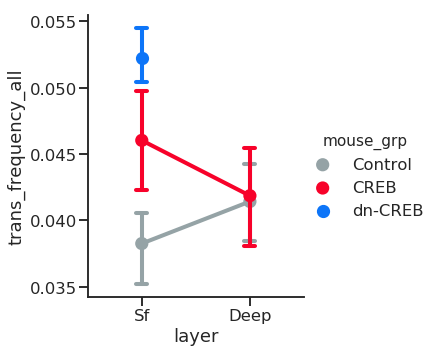

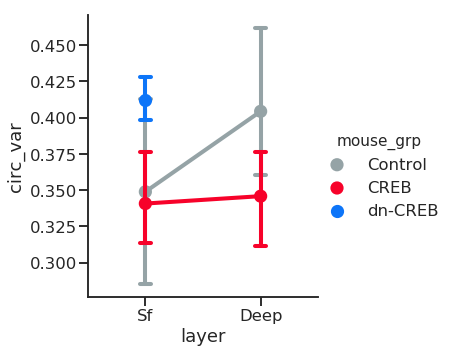

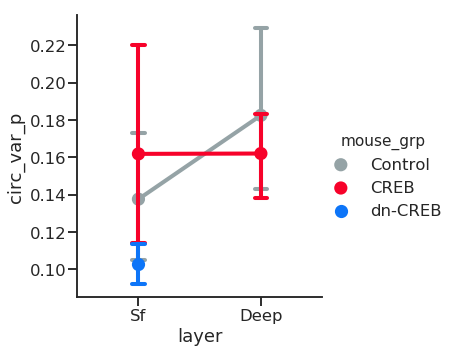

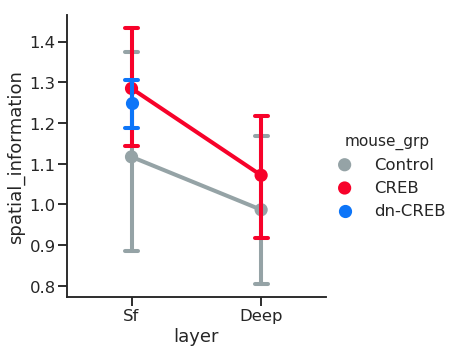

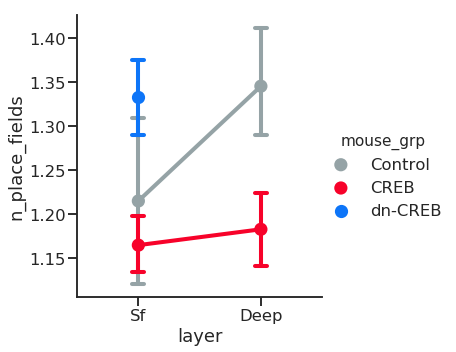

In [55]:
for key in df_expt.select_dtypes('float64').columns:
    
    g = sns.catplot(kind='point',data=df_expt,hue="mouse_grp",x="layer",y=key,
                capsize=.1)

# Activity place cell split (extra)

In [33]:
df_auc, df_auc_raw = mjdplot.percent_activity_and_place(data,"place","auc",return_raw=True)
df_freq, df_freq_raw = mjdplot.percent_activity_and_place(data,"place","freq",return_raw=True)

NameError: global name 'stats' is not defined

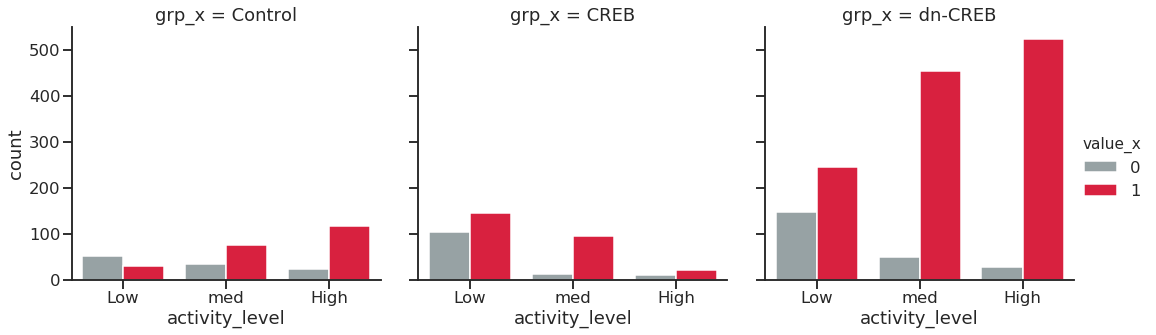

In [34]:
# auc raw
sns.catplot(x="activity_level",hue="value_x",col="grp_x",kind="count",data=df_auc)

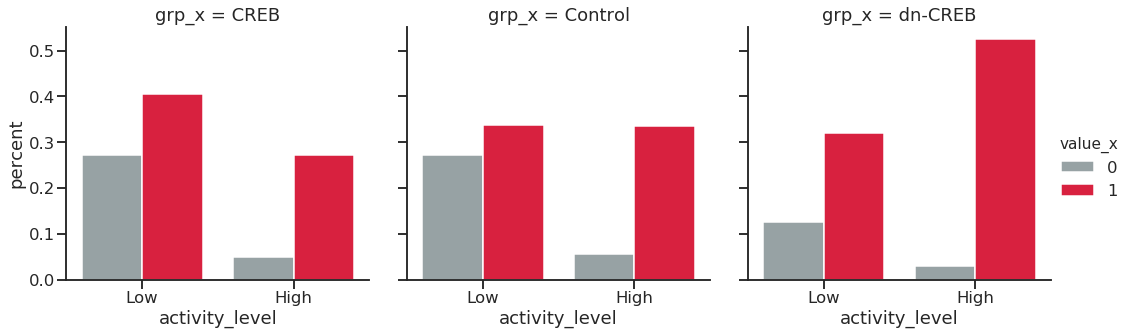

In [23]:
# auc proportion
sns.catplot(x="activity_level",y="percent",hue="value_x",col="grp_x",
            kind="bar",data=df_place_auc.reset_index())

In [ ]:
# auc raw
sns.catplot(x="activity_level",hue="value_x",col="grp_x",kind="count",data=df_freq)

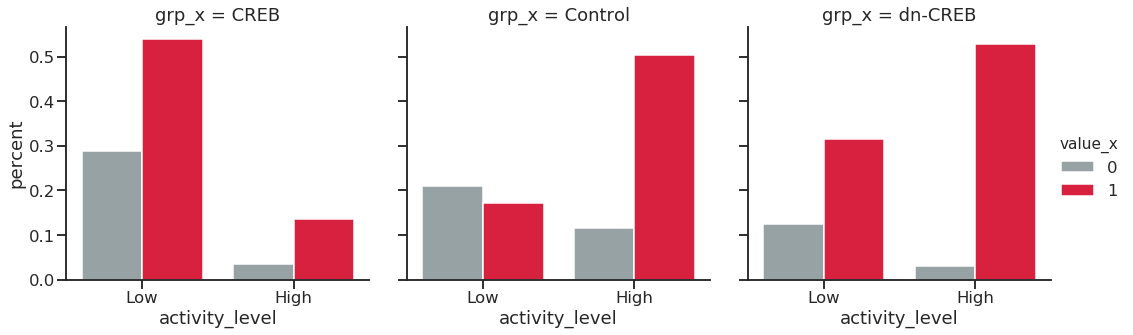

In [19]:
# freq percent
sns.catplot(x="activity_level",y="percent",hue="value_x",col="grp_x",
            kind="bar",data=df_place_freq.reset_index())